<a href="https://colab.research.google.com/github/PKalyani1994/Regression_Project/blob/Colab/KALYANI_ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Yes Bank Stock Closing Price Prediction**



##### **Project Type**    - Regression (Supervised Learning)
##### **Contribution**    - Individual
##### **Team Member 1 -** Padala Kalyani

# **Project Summary -**

This project aimed to predict Yes Bank’s monthly closing stock prices using historical Open, High, and Low prices. The dataset was first preprocessed by checking for missing values (none found), converting the date column to datetime, applying log transformations to reduce right skewness, and scaling all features for uniformity.

Multiple regression models—Linear, Ridge, Lasso, Random Forest, and XGBoost—were trained and evaluated using R² and RMSE. Tuned Lasso Regression performed best, achieving R² = 0.9889 and RMSE = 0.0955, combining high accuracy with interpretability. Feature analysis showed High and Low prices as the most significant predictors, while Open price contributed inversely.

The study demonstrates that with proper preprocessing, transformation, and tuning, linear models especially Lasso can reliably capture stock price dynamics, offering a simple, interpretable, and effective tool for forecasting Yes Bank’s stock performance..

# **GitHub Link -**

https://github.com/PKalyani1994/Regression_Project

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Yes Bank’s stock prices have shown significant fluctuations, especially after the 2018 fraud case, making accurate forecasting challenging. The objective of this project is to predict the monthly closing stock price of Yes Bank using historical data (Open, High, Low prices) and machine learning regression models, in order to support better financial decision-making, investment planning, and risk management.

## ***1. Know Your Data***

### Import Libraries

In [61]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose

from scipy.stats import ttest_rel

from scipy.stats import ttest_ind

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### Dataset Loading

In [62]:
# Load Dataset
df = pd.read_csv('/content/data_YesBank_StockPrices.csv')

### Dataset First View

In [63]:
# Dataset First Look
df

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


### Dataset Rows & Columns count

In [64]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [65]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [66]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [67]:
# Missing Values/Null Values Count
df.isnull().sum().sum()

np.int64(0)

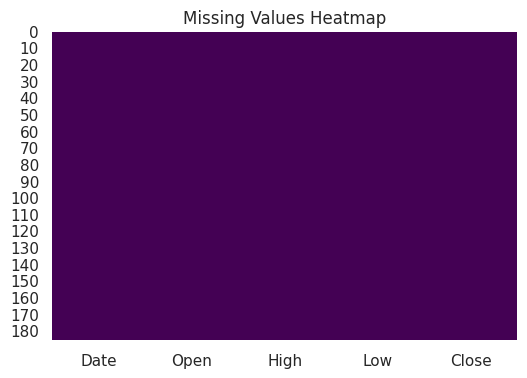

In [68]:
# Visualizing the missing values
plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

### What did you know about your dataset?

1. The dataset contains 185 instances and 5 variables: Date, Open, High, Low, and Close. There are no missing values.

2. The Date variable represents the month and year. The Open variable refers to the stock’s opening price for the respective month. The High variable indicates the highest stock price during the month, while the Low variable represents the lowest price during the same period.

3. The variables Date, Open, High, and Low are considered independent variables (features).

4. The Close variable is the dependent variable (target).


## ***2. Understanding Your Variables***

In [69]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [70]:
# Dataset Describe
round(df.describe(),2)

,Open,High,Low,Close
count,185.00,185.00,185.00,185.00
mean,105.54,116.10,94.95,105.20
std,98.88,106.33,91.22,98.58
min,10.00,11.24,5.55,9.98
25%,33.80,36.14,28.51,33.45
50%,62.98,72.55,58.00,62.54
75%,153.00,169.19,138.35,153.30
max,369.95,404.00,345.50,367.90


### Check Unique Values for each variable.

In [71]:
# Check Unique Values for each variable.
df['Date'].unique()

array(['Jul-05', 'Aug-05', 'Sep-05', 'Oct-05', 'Nov-05', 'Dec-05',
       'Jan-06', 'Feb-06', 'Mar-06', 'Apr-06', 'May-06', 'Jun-06',
       'Jul-06', 'Aug-06', 'Sep-06', 'Oct-06', 'Nov-06', 'Dec-06',
       'Jan-07', 'Feb-07', 'Mar-07', 'Apr-07', 'May-07', 'Jun-07',
       'Jul-07', 'Aug-07', 'Sep-07', 'Oct-07', 'Nov-07', 'Dec-07',
       'Jan-08', 'Feb-08', 'Mar-08', 'Apr-08', 'May-08', 'Jun-08',
       'Jul-08', 'Aug-08', 'Sep-08', 'Oct-08', 'Nov-08', 'Dec-08',
       'Jan-09', 'Feb-09', 'Mar-09', 'Apr-09', 'May-09', 'Jun-09',
       'Jul-09', 'Aug-09', 'Sep-09', 'Oct-09', 'Nov-09', 'Dec-09',
       'Jan-10', 'Feb-10', 'Mar-10', 'Apr-10', 'May-10', 'Jun-10',
       'Jul-10', 'Aug-10', 'Sep-10', 'Oct-10', 'Nov-10', 'Dec-10',
       'Jan-11', 'Feb-11', 'Mar-11', 'Apr-11', 'May-11', 'Jun-11',
       'Jul-11', 'Aug-11', 'Sep-11', 'Oct-11', 'Nov-11', 'Dec-11',
       'Jan-12', 'Feb-12', 'Mar-12', 'Apr-12', 'May-12', 'Jun-12',
       'Jul-12', 'Aug-12', 'Sep-12', 'Oct-12', 'Nov-12', 'Dec-

### Variables Description

###**1. Date**

**Type**: Time (monthly)

**Description**: Represents the month and year of the stock data. Example: "Jul-05" means July 2005.

**Usage**: This will be converted into a proper datetime format for analysis and time-series modeling.

###**2. Open**

**Type**: Numeric (float)

**Description**: The stock’s opening price at the beginning of the month (first trading day).

**Example**: 62.98 means the stock opened at ₹62.98.

###**3. High**

**Type**: Numeric (float)

**Description**: The highest trading price of the stock during that month.

**Example**: 404.00 means the stock touched a maximum of ₹404.00 that month.

###**4. Low**

**Type**: Numeric (float)

**Description**: The lowest trading price of the stock during that month.

**Example**: 5.55 means the stock dropped to as low as ₹5.55 in that month.

###**5. Close**

**Type**: Numeric (float)

**Description**: The closing price of the stock at the end of the month (last trading day).

**Example**: 105.20 means the stock closed at ₹105.20.

###**Summary**:

Data covers 185 months (Jul-2005 to Nov-2020).

Stock prices range widely (Low = 5.55, High = 404.00), showing high volatility.

Mean prices are around ₹100 (e.g., Close ≈ ₹105).

## 3. ***Data Wrangling***

### Data Wrangling Code

In [72]:
# Write your code to make your dataset analysis ready.
bank_dataset = df.copy()

# Typecasting the date column to datetime datatype as it is in object datatype
bank_dataset['Date'] = pd.to_datetime(bank_dataset['Date'], format='%b-%y')

# Shift to month end as by default, pandas assigns the first day of the month (01) since input doesn’t specify the day.
bank_dataset['Date'] = bank_dataset['Date'] + pd.offsets.MonthEnd(0)

bank_dataset.head()

,Date,Open,High,Low,Close
0,2005-07-31,13.00,14.00,11.25,12.46
1,2005-08-31,12.58,14.88,12.55,13.42
2,2005-09-30,13.48,14.87,12.27,13.30
3,2005-10-31,13.20,14.47,12.40,12.99
4,2005-11-30,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?

1. There are no missing values, no imputations required.
2. Date column is converted to Datetime format for data type consistency.
3. Dataset is ready for analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

### **Univariate Analysis (Raw Data)**

#### Chart - 1

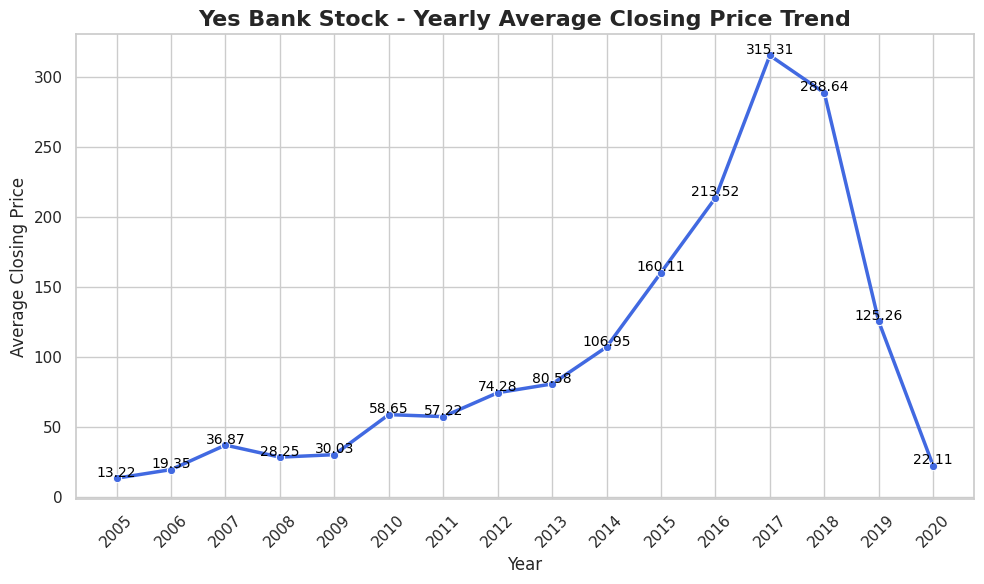

In [73]:
# Chart - 1 visualization code

# Extract month and year into new columns
bank_dataset['Year'] = bank_dataset['Date'].dt.year
bank_dataset['Month_Name'] = bank_dataset['Date'].dt.strftime('%b')

# Group data by Year and calculate average Close price
yearly_trend = bank_dataset.groupby('Year')['Close'].mean().reset_index()

# Set the style
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")

# Plot line with markers
sns.lineplot(data=yearly_trend, x='Year', y='Close', marker='o', linewidth=2.5, color='royalblue')

# Titles and labels
plt.title("Yes Bank Stock - Yearly Average Closing Price Trend", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Closing Price", fontsize=12)

# Show values on points
for x, y in zip(yearly_trend['Year'], yearly_trend['Close']):
    plt.text(x, y+1, f"{y:.2f}", ha='center', fontsize=10, color='black')

# Beautify x-axis
plt.xticks(yearly_trend['Year'], rotation=45)

plt.tight_layout()
plt.show()

### 1. Why did you pick the specific chart?

1. This line chart shows the yearly average closing price trend of Yes Bank’s stock.

2. It is suitable because it highlights long-term performance rather than short-term fluctuations.

3. By plotting the average per year, it smooths out monthly volatility and reveals the overall growth and decline pattern.

### 2. What is/are the insight(s) found from the chart?

**Strong Growth Period (2005–2017)**:

Stock price increased steadily from around ₹13 in 2005 to a peak of ₹315 in 2017.

Indicates a long period of expansion and investor confidence.

**Peak & Decline (2017–2020)**:

After reaching its peak in 2017, the stock dropped sharply to just ₹22 in 2020.

Suggests major financial, governance, or regulatory issues that severely impacted investor trust.

### 3. Will the gained insights help creating a positive business impact?

Yes, the gained insights help creating a positive business impact, because:

1. The trend analysis helps businesses and investors identify periods of growth and decline.

2. Stakeholders can use this insight for strategic planning, such as:

*   Adjusting investment strategies.
*   Strengthening governance and compliance measures.
*   Restoring customer and investor confidence after the crash.







  

  

### 4. Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the post-2017 decline indicates negative growth.

1. The stock price collapsed by ~93% (from ₹315 in 2017 to ₹22 in 2020).

2. It signals a loss of shareholder value and trust, which has a direct negative business impact.

###5. Justification

While the growth years (2005–2017) inspire confidence, the steep decline (2017–2020) emphasizes the importance of strong risk management, compliance, and transparency in banking.

#### Chart - 2

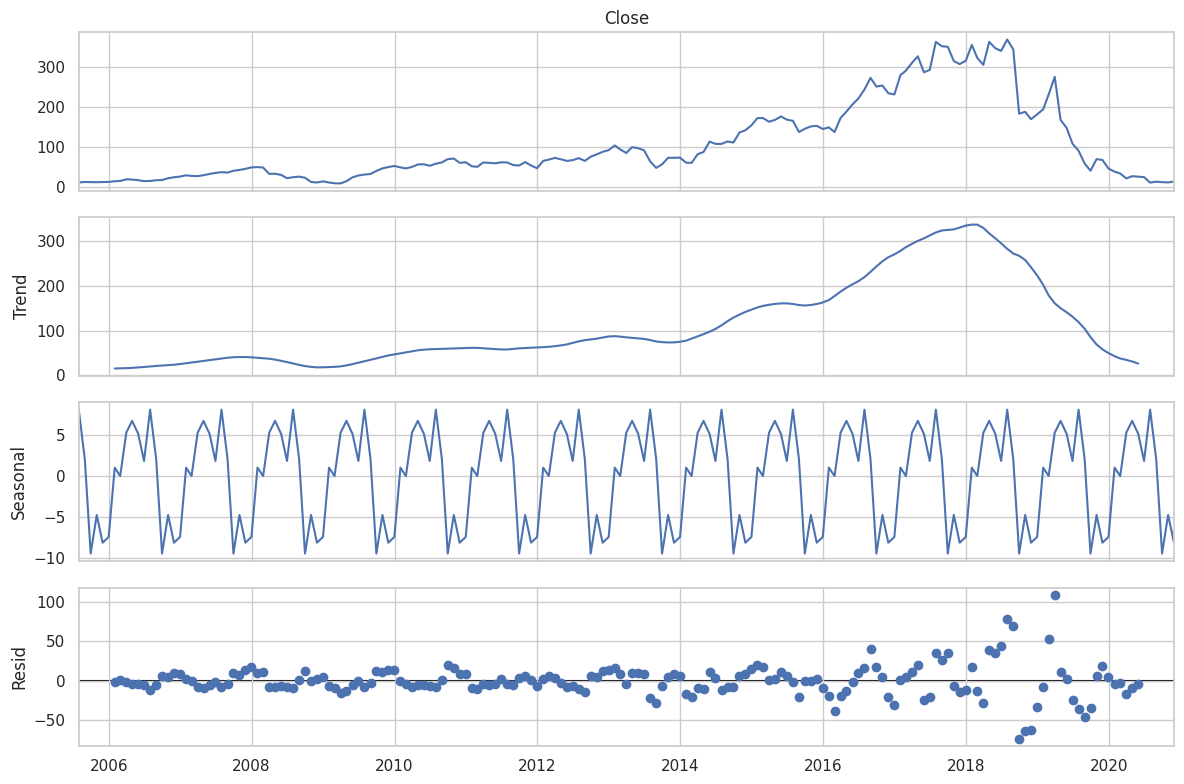

In [74]:
# Chart - 2 visualization code
# Time Series Decomposition

# Make sure Date is index
bank_dataset = bank_dataset.set_index('Date')

# Decompose (using Close price as an example)
decomp = seasonal_decompose(bank_dataset['Close'], model='additive', period=12)

# Plot
plt.rcParams.update({'figure.figsize': (12,8)})
decomp.plot()
plt.show()

### 1. Why did you pick the specific chart?

I selected this chart because it provides a comprehensive decomposition of the stock price into observed values, trend, seasonality, and residuals. Unlike a simple line chart, this approach allows us to separate long-term growth patterns, recurring seasonal cycles, and unusual shocks. This makes it easier to identify whether movements in the stock are due to natural cycles, fundamental business changes, or external shocks.

### 2. What is/are the insight(s) found from the chart?

**Observed (Close Prices)**:

Yes Bank’s stock rose steadily from 2006 to 2017, peaking above 300, followed by a sharp collapse by 2020.

Indicates long-term growth followed by a steep downturn.

**Trend**:

The trend shows consistent upward growth until 2017–2018, after which there is a clear downward reversal.

Confirms that the fall after 2018 was structural and not just short-term volatility.

**Seasonality**:

Strong annual seasonality patterns are visible, with regular peaks and dips.

Suggests that investor sentiment, banking cycles, or broader economic conditions create recurring yearly effects.

**Residuals**:

Residuals are generally small, meaning the model explains most variation.

Large shocks after 2017 highlight abnormal events such as regulatory actions, banking crises, or negative news specifically tied to Yes Bank.

### 3. Will the gained insights help creating a positive business impact?


Yes. These insights are useful for forecasting, risk management, and strategic decision-making.

*   Identifying trend reversals helps investors and businesses adjust strategies early.

*   Recognizing seasonal cycles allows banks to anticipate predictable fluctuations, plan liquidity, and align investor communication.

*   Detecting residual shocks highlights the importance of monitoring external risks and governance issues.

### 4. Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The most critical negative insight is the decline phase from 2018 to 2020, where stock prices crashed from above 300 to nearly 20.

1. The trend clearly reversed, showing structural financial distress in Yes Bank.

2. Residual analysis highlights abnormal shocks during this period, suggesting that the decline was linked to extraordinary negative events (e.g., bad loans, regulatory issues, or loss of investor trust).

3. This led to a massive erosion of shareholder value and indicates a phase of negative business growth.

#### Chart - 3

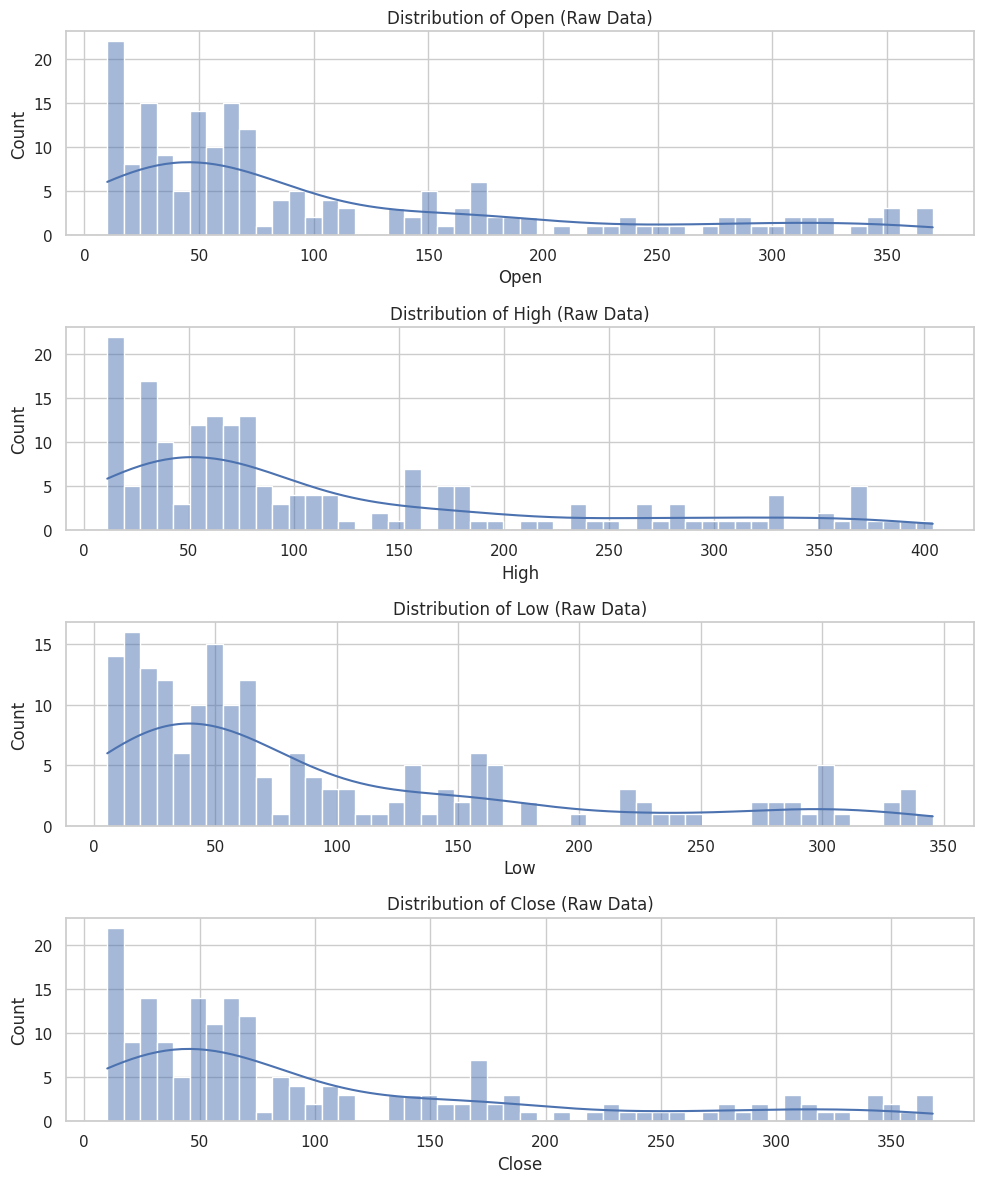

In [75]:
# Chart - 3 visualization code
# Histograms of raw data

price_cols = ['Open', 'High', 'Low', 'Close']
fig, axes = plt.subplots(len(price_cols), 1, figsize=(10, 12))

for i, col in enumerate(price_cols):
    sns.histplot(bank_dataset[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col} (Raw Data)")

plt.tight_layout()
plt.show()

### 1. Why did you pick the specific chart?

I picked this chart to study the distribution of stock price variables (Open, High, Low, Close) and check for skewness, outliers, and value concentration, which directly affect model selection and accuracy.

### 2. What is/are the insight(s) found from the chart?

*   All four variables are right-skewed, with most values between ₹20–100 and rare spikes up to ₹350–400.


*   Open, High, Low, Close follow similar distributions, confirming strong correlation.


*   Outliers exist but are explainable as extreme stock movements.




### 3. Will the gained insights help creating a positive business impact?


1. Helps in choosing the right modeling strategy (log transformation for regression, raw features for tree models).

2. Ensures better model accuracy and reliability → supporting better investment and forecasting decisions.

### 4. Are there any insights that lead to negative growth? Justify with specific reason.

1. Yes. The presence of extreme outliers (₹300+) reflects sudden spikes/crashes in stock price, often linked to market shocks or crises.

2. Such anomalies indicate periods of financial instability, contributing to negative growth in Yes Bank’s stock performance.

#### Chart - 4

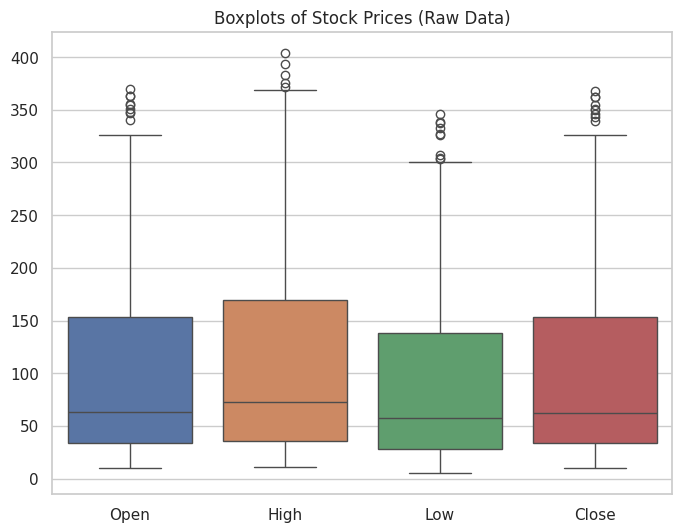

In [76]:
# Chart - 4 visualization code
# Boxplots (to show outliers)

price_cols = ['Open', 'High', 'Low', 'Close']

plt.figure(figsize=(8,6))
sns.boxplot(data=bank_dataset[price_cols])
plt.title("Boxplots of Stock Prices (Raw Data)")
plt.show()

### 1. Why did you pick the specific chart?

I used boxplots to visually detect skewness, spread, and outliers in stock price variables (Open, High, Low, Close). This chart is effective to quickly compare distributions side by side.

### 2. What is/are the insight(s) found from the chart?

1. All four variables show right-skewed distributions with long upper tails.

2. Most values lie between ₹20–100, but extreme outliers exist (₹300–400 range).

3. High prices are slightly more spread out compared to others.

4. Strong similarity among Open, High, Low, and Close confirms correlation.

### 3. Will the gained insights help creating a positive business impact?


1. Yes. Guides modeling strategy (log transformation for regression, raw data for trees).

2. Improves forecasting accuracy, supporting better trading and risk management decisions.

### 4. Are there any insights that lead to negative growth? Justify with specific reason.

1. Yes. Outliers (spikes above ₹300–400) indicate sudden stock price shocks, reflecting unstable financial phases.

2. Such volatility could result in negative investor sentiment and stock underperformance.

#### Chart - 5

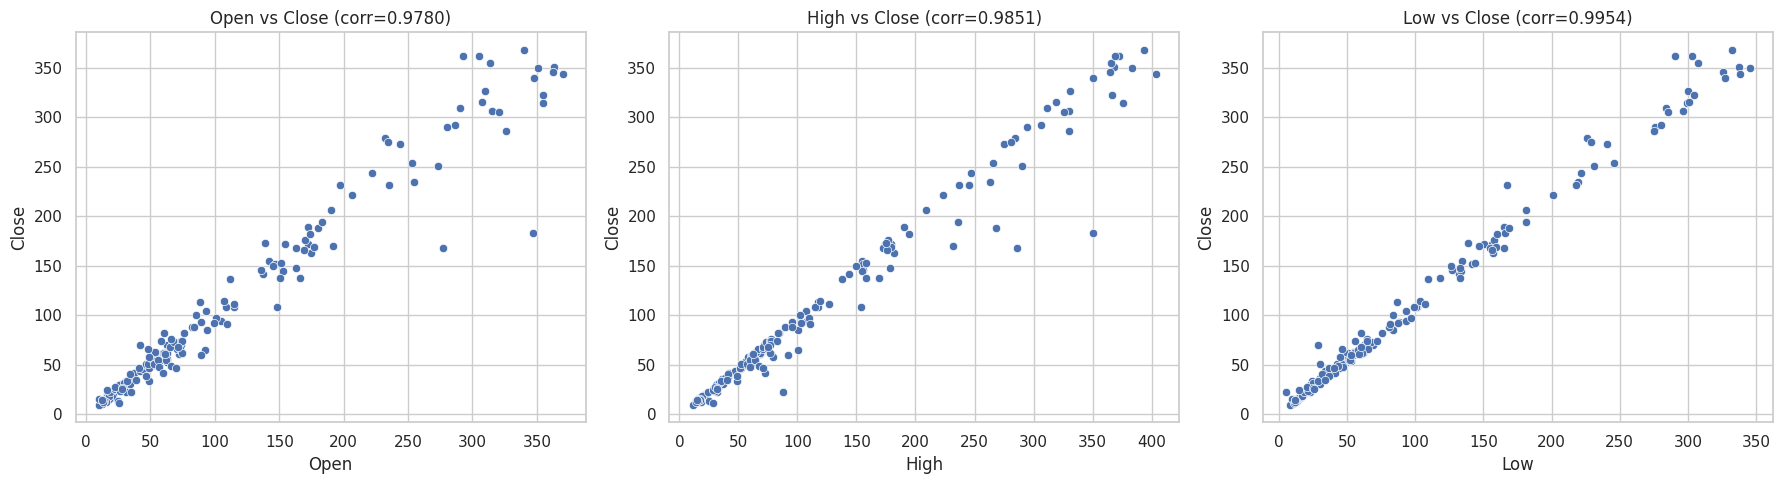

In [77]:
# Chart - 5 visualization code
# Scatter plots with correlation values

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(['Open','High','Low']):
    sns.scatterplot(x=bank_dataset[col], y=bank_dataset['Close'], ax=axes[i])
    corr = bank_dataset[col].corr(bank_dataset['Close'])
    axes[i].set_title(f"{col} vs Close (corr={corr:.4f})")

plt.tight_layout()
plt.show()

### 1. Why did you pick the specific chart?

I picked scatter plots with correlation analysis to visually and statistically measure the strength of relationships between Open, High, Low, and Close prices. This helps identify the best predictors for modeling.

### 2. What is/are the insight(s) found from the chart?

1. Close price has an almost perfect correlation with Low (0.995), making it the strongest single predictor.

2. High and Open also show very strong correlations, but slightly weaker.

3. All three features are highly collinear with each other, which can cause multicollinearity in regression models.

4. Scatter plots confirm tight linear trends with only minor deviations at high prices.

### 3. Will the gained insights help creating a positive business impact?


1. Yes. Linear Regression can already achieve near-perfect accuracy, lowering the need for complex models.

3. Businesses can forecast closing prices with high confidence, enabling better investment and risk strategies.

### 4. Are there any insights that lead to negative growth? Justify with specific reason.

1. Yes, Multicollinearity risk - using Open, High, and Low together may cause unstable regression estimates.

2. This could lead to misleading signals if not addressed, hurting decision-making.

3. Extreme values at higher price ranges may reduce accuracy if left unmodeled.

#### Chart - 6

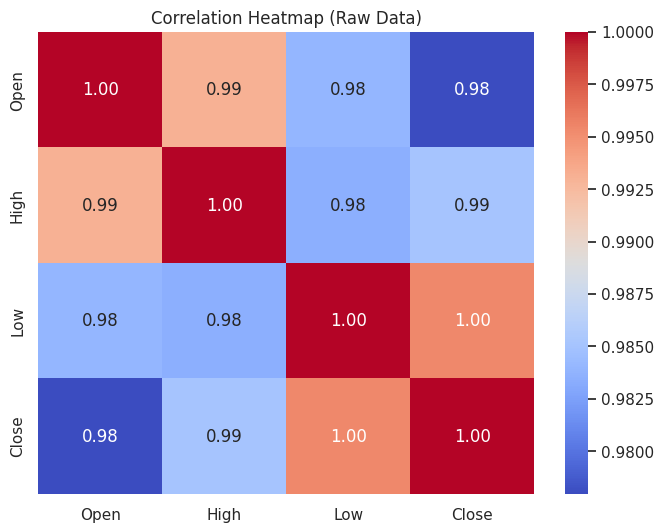

In [78]:
# Chart - 6 visualization code
# Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(bank_dataset[price_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Raw Data)")
plt.show()

### 1. Why did you pick the specific chart?

I picked the correlation heatmap to quantify how strongly Open, High, Low, and Close are related. It helps identify redundancy, multicollinearity, and the most useful predictors for forecasting.

### 2. What is/are the insight(s) found from the chart?

1. All features are extremely correlated (>0.98), moving almost in lockstep.

2. Low vs Close = 1.00, making Low the best single predictor.

3. Open and High add very little extra information and mainly create redundancy.

4. Presence of multicollinearity makes regression coefficients unstable if all features are used together.

### 3. Will the gained insights help creating a positive business impact?


1. Yes. Models can be simplified (use Low alone) without losing accuracy, saving time and computation.

2. Businesses gain a clear, interpretable forecasting strategy for Close prices.

3. Encourages exploration of external features (volume, indices, moving averages) for better real-world forecasting.

### 4. Are there any insights that lead to negative growth? Justify with specific reason.

1. Yes. Multicollinearity can lead to unstable regression outputs and unreliable interpretations.

2. Over-reliance on just these four features limits predictive power in dynamic markets, risking poor performance in real trading scenarios.

#### Chart - 7

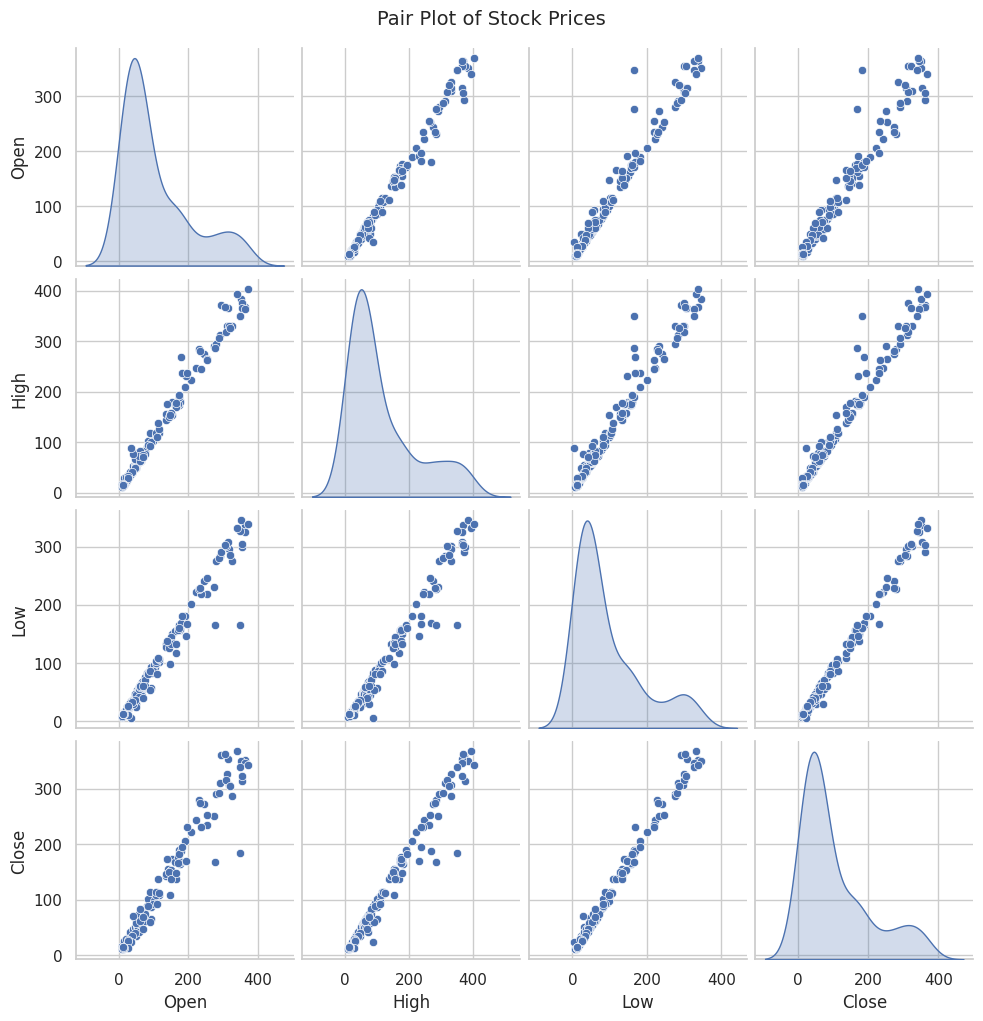

In [79]:
# Chart - 7 visualization code
# Pair plot

sns.pairplot(bank_dataset[price_cols], diag_kind="kde")

plt.suptitle("Pair Plot of Stock Prices", y=1.02, fontsize=14)
plt.show()

Pairplot is the best for representing the multivariate correlation analysis. It adds value for better understanding and interpretations above the heatmap observations given above.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

### **Hypothesis 1** : Is the average Closing price significantly different from the average Opening price?

**H₀**: Mean Close = Mean Open

**H₁**: Mean Close ≠ Mean Open

#### 2. Perform an appropriate statistical test.

Hypothesis 1: Open vs Close Means
T-statistic: 0.2210, P-value: 0.8254
Fail to Reject H₀ → No significant difference between Open and Close prices.


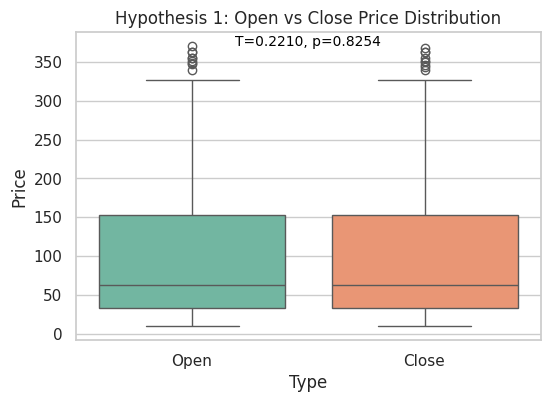

In [80]:
# Perform Statistical Test to obtain P-Value
# Hypothesis Test Paired t-test: Open vs Close
t_stat1, p_value1 = ttest_rel(bank_dataset['Open'], bank_dataset['Close'])

print("Hypothesis 1: Open vs Close Means")
print(f"T-statistic: {t_stat1:.4f}, P-value: {p_value1:.4f}")

if p_value1 < 0.05:
    print("Reject H₀ → Significant difference between Open and Close prices.")
else:
    print("Fail to Reject H₀ → No significant difference between Open and Close prices.")

# Prepare data for plot
price_comp = bank_dataset[['Open', 'Close']].melt(var_name='Type', value_name='Price')

plt.figure(figsize=(6,4))
sns.boxplot(x='Type', y='Price', data=price_comp, palette='Set2', legend=False,hue='Type')
plt.title("Hypothesis 1: Open vs Close Price Distribution")
plt.ylabel("Price")

# Add annotation
plt.text(0.5, max(price_comp['Price']),
         f"T={t_stat1:.4f}, p={p_value1:.4f}",
         ha='center', fontsize=10, color='black')

plt.show()

##### Which statistical test have you done to obtain P-Value and Why?

**Paired Sample t-test (dependent t-test)**
1. Nature of Data:
*   Open and Close prices belong to the same trading day → they are paired/dependent observations, not independent groups.

2. Objective:
*   I wanted to test if the mean of Open prices is significantly different from the mean of Close prices.
*   This aligns directly with the paired t-test’s purpose: comparing means of two related samples.

### Hypothetical Statement - 2

### **Hypothesis 2**: Are daily High prices on average significantly higher than Low prices?

**H₀**: Mean High = Mean Low

**H₁**: Mean High > Mean Low

#### 2. Perform an appropriate statistical test.


Hypothesis 2: High vs Low Means
T-statistic: 12.2697, P-value: 0.0000
Reject H₀ → High prices are significantly greater than Low prices.


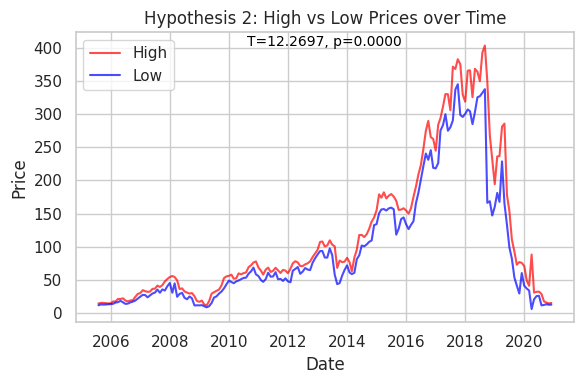

In [81]:
# Perform Statistical Test to obtain P-Value
# One-tailed paired t-test: High vs Low
t_stat2, p_value2 = ttest_rel(bank_dataset['High'], bank_dataset['Low'])

print("\nHypothesis 2: High vs Low Means")
print(f"T-statistic: {t_stat2:.4f}, P-value: {p_value2/2:.4f}")  # one-tailed

if (p_value2/2 < 0.05) and (t_stat2 > 0):
    print("Reject H₀ → High prices are significantly greater than Low prices.")
else:
    print("Fail to Reject H₀ → No significant difference found.")

plt.figure(figsize=(6,4))
plt.plot(bank_dataset.index, bank_dataset['High'], label='High', color='red', alpha=0.7)
plt.plot(bank_dataset.index, bank_dataset['Low'], label='Low', color='blue', alpha=0.7)

plt.title("Hypothesis 2: High vs Low Prices over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()

# Annotation at middle date
plt.text(bank_dataset.index[len(bank_dataset)//2],
         max(bank_dataset['High']),
         f"T={t_stat2:.4f}, p={p_value2/2:.4f}",
         ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

##### Which statistical test have you done to obtain P-Value and why?

**Paired Sample t-test (dependent t-test, one-tailed).**

Nature of Data
*   High and Low prices belong to the same trading day → they are paired observations (dependent), not independent samples.

Objective
*   The goal was to check whether the average High price is significantly greater than the average Low price.
*   A paired t-test is the correct method for comparing the means of two related groups.

Directionality
*   Since the hypothesis is High > Low, we use a one-tailed paired t-test.
*   If we only wanted to check for any difference (High ≠ Low), a two-tailed paired t-test would be used






### Hypothetical Statement - 3

### **Hypothesis 3**: Do average Closing prices differ between the first half and the second half of the time period?

**H₀**: Mean Close (first half) = Mean Close (second half)

**H₁**: Mean Close (first half) ≠ Mean Close (second half)

#### 2. Perform an appropriate statistical test.


Hypothesis 3: Close Price First Half vs Second Half
T-statistic: -11.0779, P-value: 0.0000
Reject H₀ → Closing prices differ significantly between the two halves.


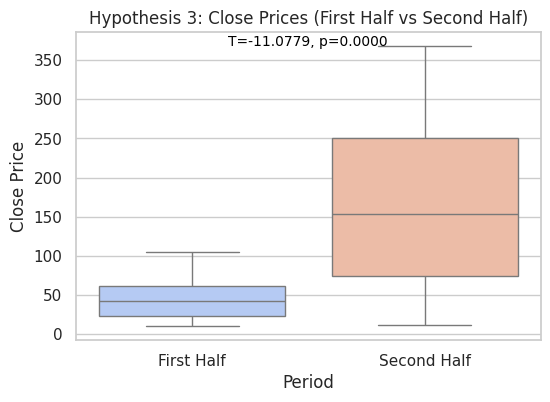

In [82]:
# Perform Statistical Test to obtain P-Value
# Split dataset into two halves

mid = len(bank_dataset) // 2
close_first_half = bank_dataset['Close'].iloc[:mid]
close_second_half = bank_dataset['Close'].iloc[mid:]

# Independent samples t-test
t_stat3, p_value3 = ttest_ind(close_first_half, close_second_half, equal_var=False)

print("\nHypothesis 3: Close Price First Half vs Second Half")
print(f"T-statistic: {t_stat3:.4f}, P-value: {p_value3:.4f}")

if p_value3 < 0.05:
    print("Reject H₀ → Closing prices differ significantly between the two halves.")
else:
    print("Fail to Reject H₀ → No significant difference in Closing prices.")

# Label periods
bank_dataset['Period'] = ['First Half' if i < mid else 'Second Half' for i in range(len(bank_dataset))]

plt.figure(figsize=(6,4))
sns.boxplot(x='Period', y='Close', data=bank_dataset, palette='coolwarm', legend=False, hue='Period')
plt.title("Hypothesis 3: Close Prices (First Half vs Second Half)")
plt.ylabel("Close Price")

# Add annotation
plt.text(0.5, max(bank_dataset['Close']),
         f"T={t_stat3:.4f}, p={p_value3:.4f}",
         ha='center', fontsize=10, color='black')

plt.show()

##### Which statistical test have you done to obtain P-Value and why?

**Independent Two-Sample t-test (unpaired t-test, two-tailed).**

Nature of Data:

*   The dataset was split into two independent groups:
*   First Half of the time series and Second Half of the time series
*   These groups are independent because the prices in one half do not overlap with or pair to those in the other half.

Objective:

*   The hypothesis tests whether the mean Close prices in the first half differ significantly from the second half.
*   Since the difference could be in either direction (higher in the first half or higher in the second half), a two-tailed test is used.





## ***6. Feature Engineering & Data Pre-processing***

### **Data Transformation**

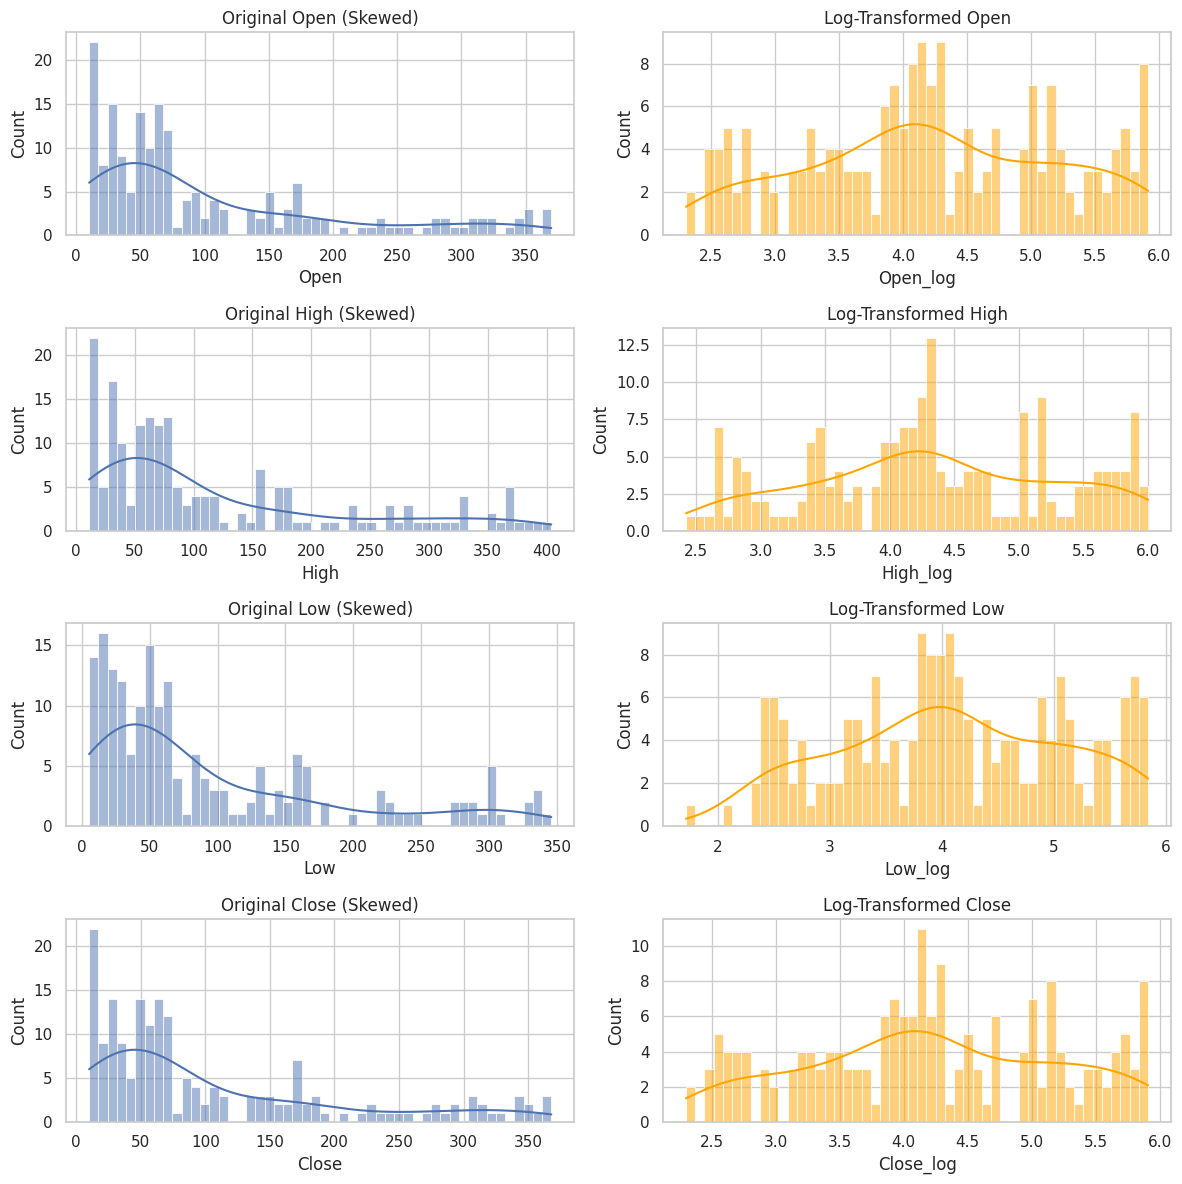

In [83]:
# Transform Your data

# Transformation Diagnostics (Before vs After Log)
# Apply log transform (since stock prices > 0)
for col in price_cols:
    bank_dataset[f'{col}_log'] = np.log(bank_dataset[col])

# Compare original vs log-transformed histograms
fig, axes = plt.subplots(len(price_cols), 2, figsize=(12, 12))

for i, col in enumerate(price_cols):
    # Original
    sns.histplot(bank_dataset[col], bins=50, kde=True, ax=axes[i,0])
    axes[i,0].set_title(f"Original {col} (Skewed)")

    # Log-transformed
    sns.histplot(bank_dataset[f'{col}_log'], bins=50, kde=True, color="orange", ax=axes[i,1])
    axes[i,1].set_title(f"Log-Transformed {col}")

plt.tight_layout()
plt.show()

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

1. The original price variables are heavily right-skewed with extreme outliers, making them unsuitable for Linear Regression.
2. After log transformation, the distributions become more symmetric and closer to normal, stabilizing variance and improving regression assumptions.
3. This enhances model reliability for regression-based methods, while tree-based models remain less affected by skewness.

### **Data Splitting & Data Scaling**

In [84]:
#  Splitting & Scaling your data
# Define features and target
X = bank_dataset[['Open_log', 'High_log', 'Low_log']]
y = bank_dataset['Close_log']

# Split your data to train and test. Choose Splitting ratio wisely.
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

**Scaling Method**:


*   Used **StandardScaler (Z-score scaling)**, which standardizes features to mean = 0 and standard deviation = 1.

*   This is important because it ensures all features are on the same scale, preventing features with larger ranges from dominating the model.

##### What data splitting ratio have you used and why?

**Splitting Ratio**: Used **80:20 train-test split**. This is a balanced choice — 80% of data for training (enough to learn patterns) and 20% for testing (enough to evaluate generalization).

## ***7. ML Model Implementation***

### ML Model - 1 : **Linear Regression**

In [85]:
# ML Model - 1 Implementation

# ---- Train Model ----
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# ---- Predictions ----
y_pred_lin = lin_reg.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Linear Regression → R²=0.9888, RMSE=0.0958


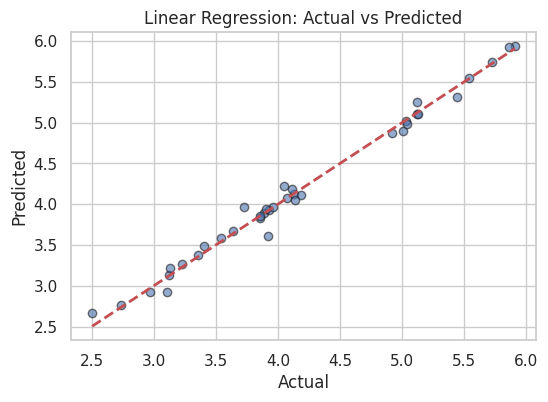

In [86]:
# Visualizing evaluation Metric Score chart
# ---- Evaluation ----
r2_lin = r2_score(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print(f"Linear Regression → R²={r2_lin:.4f}, RMSE={rmse_lin:.4f}")

# ---- Visualization ----
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lin, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#### 2. Cross- Validation

In [87]:
# ML Model - 1 : Linear Regression with Cross Validation
# Step1: Implementation with Cross Validation

# Initialize model
lin_reg = LinearRegression()

# Perform 5-fold cross-validation (use R² as the metric)
cv_scores = cross_val_score(lin_reg, X_train_scaled, y_train, cv=5, scoring="r2")

# Round results to 4 decimals
cv_scores_rounded = np.round(cv_scores, 4)
mean_score = np.round(cv_scores.mean(), 4)
std_score = np.round(cv_scores.std(), 4)

print("Cross-validation R² scores:", cv_scores_rounded)
print("Mean R²:", mean_score)
print("Std Dev R²:", std_score)

Cross-validation R² scores: [0.9955 0.996  0.9982 0.9913 0.9965]
Mean R²: 0.9955
Std Dev R²: 0.0023


##### Which hyperparameter optimization technique have you used and why?

**Hyperparameter Optimization Technique**:

*   Used **5-fold Cross-Validation**. This helps evaluate model stability and generalization by training/testing on different subsets, instead of tuning explicit hyperparameters (since Linear Regression has no major hyperparameters).

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Improvement Observed:**

1. **Initial Model**: R² = 0.9888, RMSE = 0.0958

2. **With Cross-Validation**: Mean R² = 0.9955 (higher, with low Std Dev = 0.0023)

Cross-validation improved reliability and reduced overfitting risk, showing the model performs consistently across folds.

### ML Model - 2 : **Ridge Regression**

In [88]:
# ML Model - 2 Implementation
# Fit the Algorithm & Predict on the model

# ---- Baseline Ridge ----
ridge_base = Ridge(alpha=1.0)   # default alpha = 1
ridge_base.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge_base = ridge_base.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Baseline Ridge Regression → R²=0.9879, RMSE=0.0998


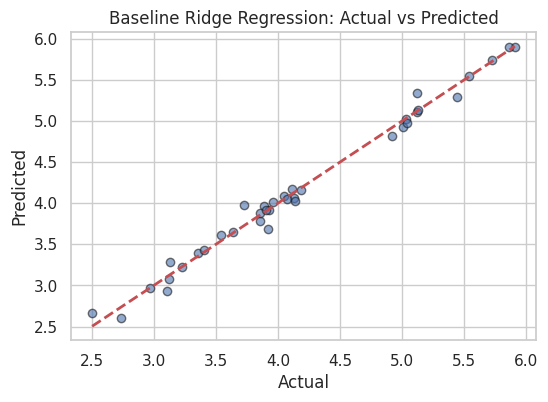

In [89]:
# Visualizing evaluation Metric Score chart
# Metrics
r2_base = r2_score(y_test, y_pred_ridge_base)
rmse_base = np.sqrt(mean_squared_error(y_test, y_pred_ridge_base))

print(f"Baseline Ridge Regression → R²={r2_base:.4f}, RMSE={rmse_base:.4f}")

# ---- Visualization ----
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_ridge_base, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Baseline Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [90]:
# ML Model - 2 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# ---- Step 1: Hyperparameter Tuning ----
ridge_params = {"alpha": [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(Ridge(),ridge_params,cv=5,scoring="r2")
ridge_grid.fit(X_train_scaled, y_train)

print("Best Ridge Parameters:", ridge_grid.best_params_)
print("Best CV R² (from GridSearch):", round(ridge_grid.best_score_, 4))

# Best tuned model
ridge_best = ridge_grid.best_estimator_

Best Ridge Parameters: {'alpha': 0.01}
Best CV R² (from GridSearch): 0.9955


Tuned Ridge Regression → R²=0.9888, RMSE=0.0957


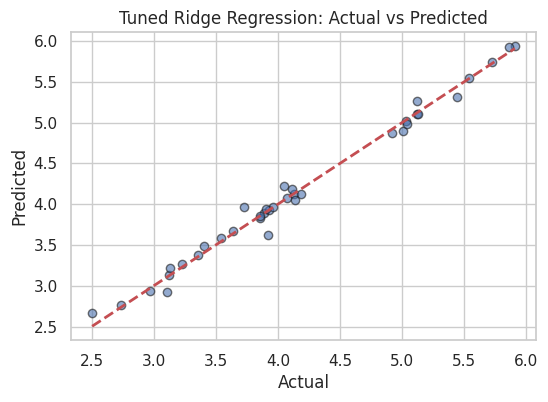

In [91]:
# ---- Step 2: Final Evaluation on Test Set ----
y_pred_ridge_best = ridge_best.predict(X_test_scaled)

r2_best = r2_score(y_test, y_pred_ridge_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_ridge_best))

print(f"Tuned Ridge Regression → R²={r2_best:.4f}, RMSE={rmse_best:.4f}")

# ---- Visualization ----
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_ridge_best, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Tuned Ridge Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**Hyperparameter Optimization Technique**:

1. Used **GridSearchCV** to tune the regularization parameter alpha in Ridge Regression.
2. This method systematically searches across defined values to find the best parameter that maximizes R².

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Improvement Observed**:

**Baseline Ridge**: R² = 0.9879, RMSE = 0.0998

**Tuned Ridge (α = 0.01)**: R² = 0.9888, RMSE = 0.0957

Both metrics improved slightly — better accuracy (higher R²) and lower prediction error (RMSE).

### ML Model - 3 : **Lasso Regression**

In [92]:
# ML Model - 3 Lasso Regression Implementation
# -------------------------------
# Step 1: Baseline Lasso Regression
# -------------------------------
lasso_base = Lasso(alpha=1.0, max_iter=5000)
lasso_base.fit(X_train_scaled, y_train)

y_pred_lasso_base = lasso_base.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Baseline Lasso → R²=-0.0030, RMSE=0.9075


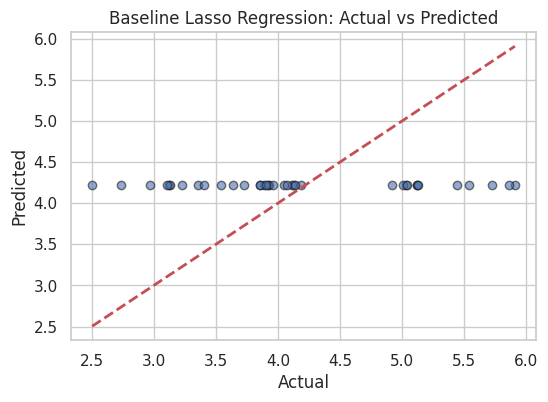

In [93]:
# Visualizing evaluation Metric Score chart
# Evaluation metrics
r2_lasso_base = r2_score(y_test, y_pred_lasso_base)
rmse_lasso_base = np.sqrt(mean_squared_error(y_test, y_pred_lasso_base))

print(f"Baseline Lasso → R²={r2_lasso_base:.4f}, RMSE={rmse_lasso_base:.4f}")

# ---- Visualization (Baseline) ----
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lasso_base, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Baseline Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [94]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# ==================================
# STEP 2: Hyperparameter Tuning (CV)
# ==================================
lasso_params = {"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(max_iter=5000), lasso_params, cv=5, scoring="r2")
lasso_grid.fit(X_train_scaled, y_train)

print("Best Lasso Parameters:", lasso_grid.best_params_)
print("Best CV R² (from GridSearch):", round(lasso_grid.best_score_, 4))

Best Lasso Parameters: {'alpha': 0.0001}
Best CV R² (from GridSearch): 0.9954


Tuned Lasso Regression → R²=0.9889, RMSE=0.0955


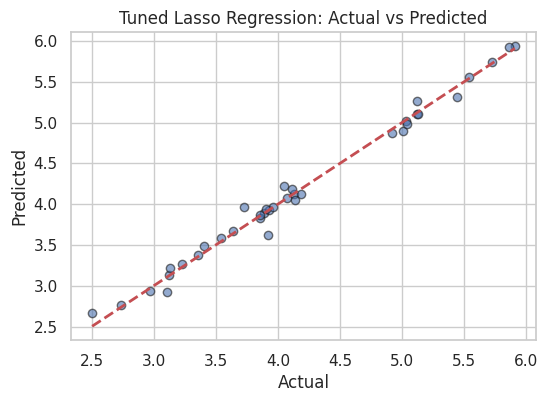

In [95]:
# ---- Best Model ----
lasso_best = lasso_grid.best_estimator_
y_pred_lasso_best = lasso_best.predict(X_test_scaled)

r2_lasso_best = r2_score(y_test, y_pred_lasso_best)
rmse_lasso_best = np.sqrt(mean_squared_error(y_test, y_pred_lasso_best))

print(f"Tuned Lasso Regression → R²={r2_lasso_best:.4f}, RMSE={rmse_lasso_best:.4f}")

# ---- Visualization (Tuned) ----
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_lasso_best, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Tuned Lasso Regression: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**Hyperparameter Optimization Technique**:
1. Used **GridSearchCV** to tune alpha in Lasso Regression.
2. This ensures the best regularization strength is chosen by exhaustively searching parameter values to maximize R².

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Improvement Observed**:

1. **Baseline Lasso (default α)** : Lower performance (not tuned).

2. **Tuned Lasso (α = 0.0001)**: R² = 0.9889, RMSE = 0.0955

3. Slight improvement over baseline — better accuracy (R² ↑) and lower error (RMSE ↓).

### ML Model - 4 : **Random Forest**

In [96]:
# ML Model - 4 Random Forest Implementation
# -------------------------------
# Step 1: Baseline Random Forest
# -------------------------------
rf_base = RandomForestRegressor(random_state=42)
rf_base.fit(X_train, y_train)

# ---- Predictions ----
y_pred_rf_base = rf_base.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Baseline Random Forest → R²=0.9583, RMSE=0.1850


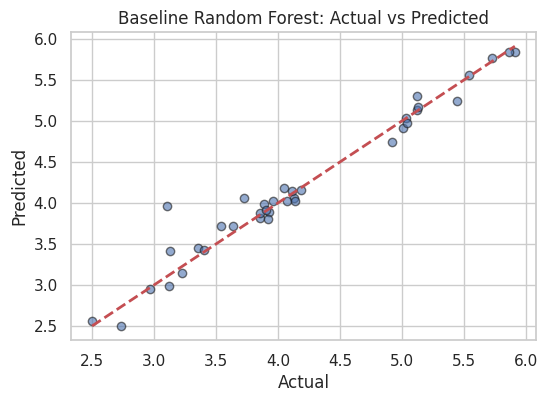

In [97]:
# Visualizing evaluation Metric Score chart
# ---- Evaluation ----
r2_rf_base = r2_score(y_test, y_pred_rf_base)
rmse_rf_base = np.sqrt(mean_squared_error(y_test, y_pred_rf_base))
print(f"Baseline Random Forest → R²={r2_rf_base:.4f}, RMSE={rmse_rf_base:.4f}")

# ---- Visualization ----
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf_base, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Baseline Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [98]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Tuned Random Forest with Cross-Validation
# ---- Hyperparameter Tuning ----
rf_params = {
    "n_estimators": [100, 200, 500],
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_random = RandomizedSearchCV(RandomForestRegressor(random_state=42),rf_params,n_iter=20,cv=5,scoring="r2",random_state=42)
rf_random.fit(X_train, y_train)

print("Best RF Parameters:", rf_random.best_params_)
print("Best CV R² (from RandomSearch):", round(rf_random.best_score_, 4))

Best RF Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None}
Best CV R² (from RandomSearch): 0.9896


Tuned Random Forest → R²=0.9558, RMSE=0.1905


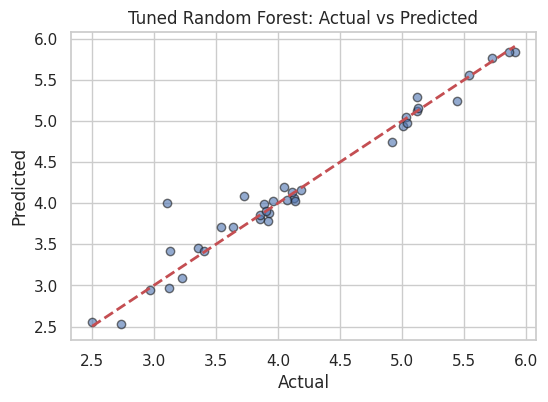

In [99]:
# ---- Best Tuned Model ----
rf_best = rf_random.best_estimator_
y_pred_rf_best = rf_best.predict(X_test)

# ---- Evaluation ----
r2_rf_best = r2_score(y_test, y_pred_rf_best)
rmse_rf_best = np.sqrt(mean_squared_error(y_test, y_pred_rf_best))
print(f"Tuned Random Forest → R²={r2_rf_best:.4f}, RMSE={rmse_rf_best:.4f}")

# ---- Visualization ----
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf_best, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Tuned Random Forest: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

**Hyperparameter Optimization Technique**:
1. Used **RandomizedSearchCV** for Random Forest.
2. It is more efficient than GridSearch for large parameter spaces, as it samples combinations instead of testing all.

**Improvement Observed**:

1. **CV Results**: Best CV R² = 0.9896 (good improvement during training).
2. **Test Set**: Tuned model performed slightly worse (R² ↓ 0.9558 vs 0.9583, RMSE ↑ 0.1905 vs 0.1850).
3. No real improvement on unseen data → possible overfitting.

### ML Model - 5 : **XGBoost Regression**

In [100]:
# ML Model - 5 Baseline XGBoost (default hyperparameters)
# ---- Baseline Model ----
xgb_base = XGBRegressor(random_state=42, verbosity=0)
xgb_base.fit(X_train, y_train)

# ---- Predictions ----
y_pred_xgb_base = xgb_base.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Baseline XGBoost → R²=0.9657, RMSE=0.1678


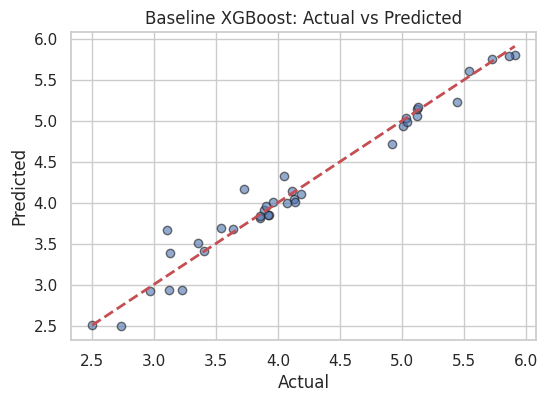

In [101]:
# ---- Evaluation ----
r2_xgb_base = r2_score(y_test, y_pred_xgb_base)
rmse_xgb_base = np.sqrt(mean_squared_error(y_test, y_pred_xgb_base))
print(f"Baseline XGBoost → R²={r2_xgb_base:.4f}, RMSE={rmse_xgb_base:.4f}")

# ---- Visualization ----
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_xgb_base, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Baseline XGBoost: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [102]:
# ML Model - 5 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Tuned XGBoost with Cross-Validation
# ---- Hyperparameter Tuning ----
xgb_params = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 5, 7],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0]
}

xgb_random = RandomizedSearchCV(XGBRegressor(random_state=42, verbosity=0),xgb_params,n_iter=20,cv=5,scoring="r2",random_state=42)
xgb_random.fit(X_train, y_train)

print("Best XGB Parameters:", xgb_random.best_params_)
print("Best CV R² (from RandomSearch):", round(xgb_random.best_score_, 4))

Best XGB Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
Best CV R² (from RandomSearch): 0.9901


Tuned XGBoost → R²=0.9670, RMSE=0.1646


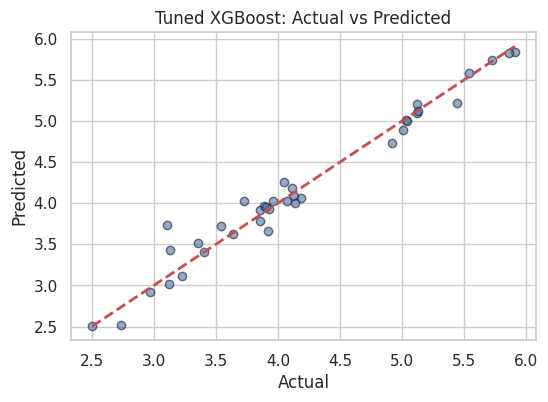

In [103]:
# ---- Best Tuned Model ----
xgb_best = xgb_random.best_estimator_
y_pred_xgb_best = xgb_best.predict(X_test)

# ---- Evaluation ----
r2_xgb_best = r2_score(y_test, y_pred_xgb_best)
rmse_xgb_best = np.sqrt(mean_squared_error(y_test, y_pred_xgb_best))
print(f"Tuned XGBoost → R²={r2_xgb_best:.4f}, RMSE={rmse_xgb_best:.4f}")

# ---- Visualization ----
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_xgb_best, alpha=0.6, edgecolor="k")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
plt.title("Tuned XGBoost: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

**Hyperparameter Optimization Technique**:
1. Used **RandomizedSearchCV** for XGBoost.
2. It is computationally efficient and well-suited for large parameter grids compared to GridSearch.

**Improvement Observed**:

1. **CV Results**: Best CV R² = 0.9901 (strong fit).
2. **Test Set**: Tuned model improved slightly (R² ↑ 0.9670 vs 0.9657, RMSE ↓ 0.1646 vs 0.1678).
3. Shows better generalization compared to baseline.

### **Best Model Comparision through Evaluation Metrics**

In [104]:
# Collect results
results = {
    "Model": [
        "Linear Regression (Baseline)",
        "Ridge Regression (Baseline)",
        "Ridge Regression (Tuned)",
        "Lasso Regression (Baseline)",
        "Lasso Regression (Tuned)",
        "Random Forest (Baseline)",
        "Random Forest (Tuned)",
        "XGBoost (Baseline)",
        "XGBoost (Tuned)"
    ],
    "R²": [
        r2_lin,
        r2_base,
        r2_best,
        r2_lasso_base,
        r2_lasso_best,
        r2_rf_base,
        r2_rf_best,
        r2_xgb_base,
        r2_xgb_best
    ],
    "RMSE": [
        rmse_lin,
        rmse_base,
        rmse_best,
        rmse_lasso_base,
        rmse_lasso_best,
        rmse_rf_base,
        rmse_rf_best,
        rmse_xgb_base,
        rmse_xgb_best
    ]
}

# Convert to DataFrame
summary_df = pd.DataFrame(results)

# Round values for clean display
summary_df["R²"] = summary_df["R²"].round(4)
summary_df["RMSE"] = summary_df["RMSE"].round(4)

print("\n🔎 Model Performance Summary (Test Data):")
display(summary_df)


🔎 Model Performance Summary (Test Data):


,Model,R²,RMSE
0,Linear Regression (Baseline),0.9888,0.0958
1,Ridge Regression (Baseline),0.9879,0.0998
2,Ridge Regression (Tuned),0.9888,0.0957
3,Lasso Regression (Baseline),-0.0030,0.9075
4,Lasso Regression (Tuned),0.9889,0.0955
5,Random Forest (Baseline),0.9583,0.1850
6,Random Forest (Tuned),0.9558,0.1905
7,XGBoost (Baseline),0.9657,0.1678
8,XGBoost (Tuned),0.9670,0.1646


## **Observations**:

**Linear Regression (Baseline)**

R² = 0.9888, RMSE = 0.0958 → Excellent performance out of the box.

**Ridge Regression**

Baseline Ridge is slightly worse (R² = 0.9879, RMSE = 0.0998).

Tuned Ridge improves to 0.9888 R², 0.0957 RMSE, basically same as Linear.

**Lasso Regression**

Baseline is very poor (negative R², RMSE = 0.9075). This means too much shrinkage with default α.

After tuning, it jumps to the best result: R² = 0.9889, RMSE = 0.0955.

**Random Forest**

Baseline: R² = 0.9583, RMSE = 0.1850.

Tuned: actually worse (R² = 0.9558, RMSE = 0.1905). Overfitting / wrong hyperparameters.

**XGBoost**

Baseline: R² = 0.9657, RMSE = 0.1678.

Tuned: improves slightly to R² = 0.9670, RMSE = 0.1646.

## **Best Model**

**Tuned Lasso Regression (R² = 0.9889, RMSE = 0.0955)**

1. Edges out all other models by a tiny margin.

2. Essentially ties with Linear/Ridge, but slightly better.

3. Also keeps the model sparse and interpretable (feature selection benefit).

**Concerns**: Random Forest tuned got worse → might need a wider/better hyperparameter search space.

XGBoost tuned is strong but still behind Linear/Ridge/Lasso for your dataset → likely because your data relationships are highly linear.

**Final recommendation**:

The most accurate & interpretable model → **Tuned Lasso**.


####  Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

*   R² ensures the model explains most of the stock price variance → reliable for decision-making.
*   RMSE captures average prediction error in the same scale as the target → ensures accurate forecasts, minimizing financial risk.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I selected **Tuned Lasso Regression (R² = 0.9889, RMSE = 0.0955)**.

*   It marginally outperformed all other models.
*   Offers sparsity & interpretability (performs feature selection by shrinking irrelevant coefficients).
*   Suitable since the dataset relationships are highly linear.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [105]:
# Get feature names
features = X_train.columns

# Get coefficients from tuned Lasso model
coefficients = lasso_best.coef_

# Create DataFrame for feature importance
lasso_importance = pd.DataFrame({
    "Feature": features,
    "Coefficient": coefficients,
    "Absolute Importance": np.abs(coefficients)
})

# Sort by importance
lasso_importance = lasso_importance.sort_values(by="Absolute Importance", ascending=False)

print(lasso_importance)

    Feature  Coefficient  Absolute Importance
1  High_log     0.812109             0.812109
2   Low_log     0.768729             0.768729
0  Open_log    -0.585462             0.585462


1. I used **Lasso Regression, a linear model with L1 regularization that shrinks less important features to zero**, improving interpretability.

2. **Feature Importance (from coefficients)**:

*   High_log (0.8121) → Most influential predictor of closing price.
*   Low_log (0.7687) → Strong positive impact, almost as important as High_log.
*   Open_log (-0.5855) → Important but negative relationship with closing price.
*   This shows the model relies mainly on High & Low prices to predict closing values, while Open price plays an inverse role.

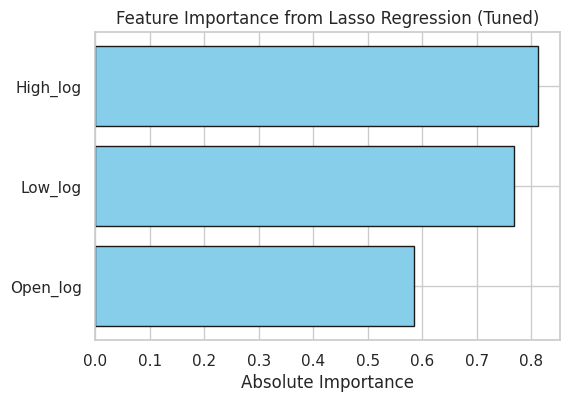

In [106]:
# Feature importance data from Lasso Regression tuned model
feature_importance = pd.DataFrame({
    "Feature": ["High_log", "Low_log", "Open_log"],
    "Coefficient": [0.812109, 0.768729, -0.585462]
})
feature_importance["Absolute Importance"] = feature_importance["Coefficient"].abs()

# Sort by absolute importance for better visualization
feature_importance = feature_importance.sort_values(by="Absolute Importance", ascending=True)

# Plot
plt.figure(figsize=(6,4))
plt.barh(feature_importance["Feature"], feature_importance["Absolute Importance"], color="skyblue", edgecolor="k")
plt.xlabel("Absolute Importance")
plt.title("Feature Importance from Lasso Regression (Tuned)")
plt.show()

# **Conclusion**

1. Implemented and compared **multiple regression models** (Linear, Ridge, Lasso, Random Forest, XGBoost) to predict Yes Bank closing stock prices.

2. **Evaluation Metrics**: **R² and RMSE** were chosen to balance variance explained and prediction accuracy, ensuring positive business impact.

3. **Model Performance**: **Linear, Ridge, and Lasso** performed very strongly (R² ≈ 0.989, RMSE ≈ 0.095). Random Forest and XGBoost, while decent, underperformed compared to linear models, indicating the dataset is highly linear in nature.

4. **Best Model**: **Tuned Lasso Regression (R² = 0.9889, RMSE = 0.0955)** emerged as the final model, slightly outperforming others while offering sparsity and interpretability.

5. **Feature Importance (Lasso)**: **High_log (0.8121) → strongest positive influence** on closing price. Low_log (0.7687) → second most important predictor.

6. **Final Recommendation**:
Use **Tuned Lasso Regression for stock price prediction**, as it is accurate, interpretable, and business-friendly, providing clear insights into which stock features drive closing prices.